In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt 

In [2]:
conn = mysql.connector.connect(
  host="localhost",
  db = "babynames",
  user="root",
  password="123456789"
)

In [3]:
babynames = pd.read_sql('SELECT * from vornamen', conn)

C:\Users\matte\AppData\Local\Temp\ipykernel_14692\4247649448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  babynames = pd.read_sql('SELECT * from vornamen', conn)


In [4]:
babynames.head()

,jahr_id,bezirk_id,geschlecht_bin,vorname,anzahl
0,1984,101,1,Andreas,4
1,1984,101,1,Bernd,1
2,1984,101,1,Christian,2
3,1984,101,1,Christoph,2
4,1984,101,1,Clemens,1


C:\Users\matte\AppData\Local\Temp\ipykernel_14692\3929157619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_male_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '1') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)


       vorname  jahr_id  Anzahl
0      Michael     1984  2280.0
1      Michael     1985  2132.0
2      Michael     1986  2260.0
3      Michael     1987  2370.0
4      Michael     1988  2197.0
5      Michael     1989  2004.0
6      Michael     1990  2092.0
7      Michael     1991  2052.0
8      Michael     1992  1991.0
9      Michael     1993  1928.0
10     Michael     1994  1819.0
11     Michael     1995  1711.0
12       Lukas     1996  1557.0
13       Lukas     1997  1551.0
14       Lukas     1998  1455.0
15       Lukas     1999  1362.0
16       Lukas     2000  1456.0
17       Lukas     2001  1293.0
18       Lukas     2002  1143.0
19       Lukas     2003  1369.0
20       Lukas     2004  1215.0
21       Lukas     2005  1042.0
22       Lukas     2006  1008.0
23       Lukas     2007   955.0
24       Lukas     2008   856.0
25       Lukas     2009   813.0
26       Lukas     2010   927.0
27  Maximilian     2011   904.0
28       David     2012   902.0
29      Tobias     2013   862.0
30      

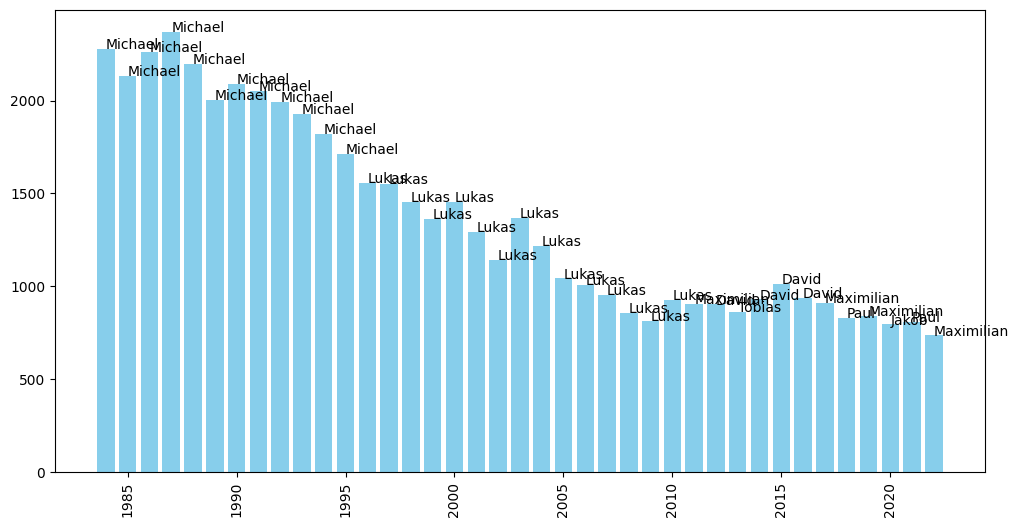

In [7]:
#most_pop_malenames during years
pop_male_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '1') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)
print(pop_male_names_year.head(34))
plt.figure(figsize=(12, 6))
plt.bar(pop_male_names_year['jahr_id'], pop_male_names_year['Anzahl'], color='skyblue')

plt.xticks(rotation=90)
for index, row in pop_male_names_year.iterrows():
    plt.text(row['jahr_id'], row['Anzahl'], row['vorname'], )
plt.show()

C:\Users\matte\AppData\Local\Temp\ipykernel_14692\2436005451.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_fem_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '2') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)


    vorname  jahr_id  Anzahl
0   Daniela     1984  1304.0
1   Daniela     1985  1213.0
2    Sandra     1986  1120.0
3   Sabrina     1987  1165.0
4     Julia     1988  1263.0
5     Julia     1989  1170.0
6     Julia     1990  1594.0
7     Julia     1991  1635.0
8     Julia     1992  1755.0
9     Julia     1993  1753.0
10    Julia     1994  1836.0
11    Julia     1995  1601.0
12    Julia     1996  1570.0
13    Julia     1997  1488.0
14    Julia     1998  1430.0
15    Julia     1999  1320.0
16    Julia     2000  1239.0
17    Julia     2001  1018.0
18     Anna     2002  1016.0
19     Anna     2003   923.0
20     Anna     2004   916.0
21   Leonie     2005   943.0
22     Lena     2006   960.0
23     Lena     2007   843.0
24   Leonie     2008   850.0
25     Anna     2009   862.0
26     Anna     2010   922.0
27     Anna     2011   844.0
28     Anna     2012   861.0
29     Anna     2013   891.0
30     Anna     2014   913.0
31     Anna     2015   971.0
32     Anna     2016   998.0
33     Anna   

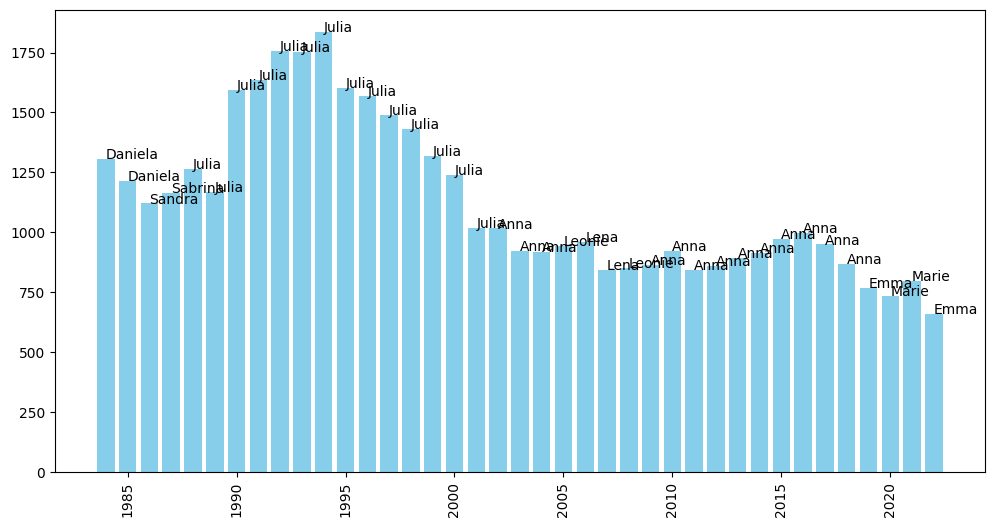

In [8]:
#most_pop_malenames during years
pop_fem_names_year = pd.read_sql("""WITH RankedNames AS (SELECT vorname, jahr_id, geschlecht_bin, Anzahl, ROW_NUMBER() OVER (PARTITION BY jahr_id ORDER BY Anzahl DESC) as name_rank FROM names_per_year WHERE geschlecht_bin = '2') SELECT vorname, jahr_id, Anzahl FROM RankedNames WHERE name_rank = 1;""", conn)
print(pop_fem_names_year.head(34))
plt.figure(figsize=(12, 6))
plt.bar(pop_fem_names_year['jahr_id'], pop_fem_names_year['Anzahl'], color='skyblue')

plt.xticks(rotation=90)
for index, row in pop_fem_names_year.iterrows():
    plt.text(row['jahr_id'], row['Anzahl'], row['vorname'], )
plt.show()

In [9]:
#the most popular male name
most_pop_male_names = pd.read_sql("""SELECT * FROM vornamen_counts ORDER BY Anzahl desc; """, conn)
print(most_pop_male_names.head(1))
#the most popular female name
most_pop_fem_names = pd.read_sql("""SELECT Vorname, SUM(Anzahl) AS Total FROM vornamen WHERE geschlecht_bin = 2 GROUP BY 
Vorname ORDER BY Total DESC LIMIT 1;""", conn)
print(most_pop_fem_names.head(2))


C:\Users\matte\AppData\Local\Temp\ipykernel_14692\2964587093.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_male_names = pd.read_sql("""SELECT * FROM vornamen_counts ORDER BY Anzahl desc; """, conn)
C:\Users\matte\AppData\Local\Temp\ipykernel_14692\2964587093.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_fem_names = pd.read_sql("""SELECT Vorname, SUM(Anzahl) AS Total FROM vornamen WHERE geschlecht_bin = 2 GROUP BY


      id  Vorname  Anzahl
0  14049  Michael   41237
  Vorname    Total
0   Julia  36514.0


C:\Users\matte\AppData\Local\Temp\ipykernel_14692\241451410.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  most_pop_unisex_names = pd.read_sql("""SELECT


<BarContainer object of 10 artists>

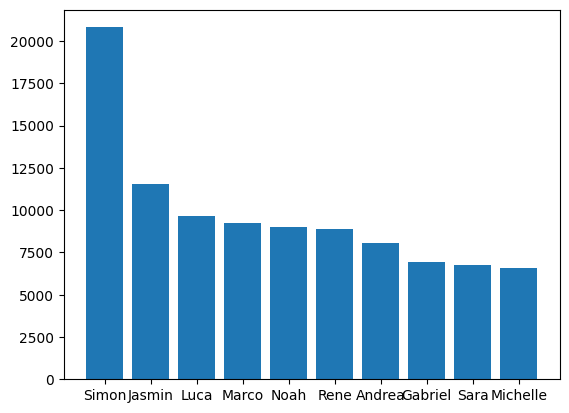

In [10]:
most_pop_unisex_names = pd.read_sql("""SELECT 
    v.Vorname, 
    SUM(v.Anzahl) as Total
FROM 
    vornamen v
WHERE 
    v.Vorname IN (SELECT Vorname FROM vornamen WHERE geschlecht_bin = 1)
    AND v.Vorname IN (SELECT Vorname FROM vornamen WHERE geschlecht_bin = 2)
GROUP BY 
    v.Vorname
ORDER BY 
    Total DESC
LIMIT 10;""", conn)
plt.bar(most_pop_unisex_names['Vorname'], most_pop_unisex_names['Total'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


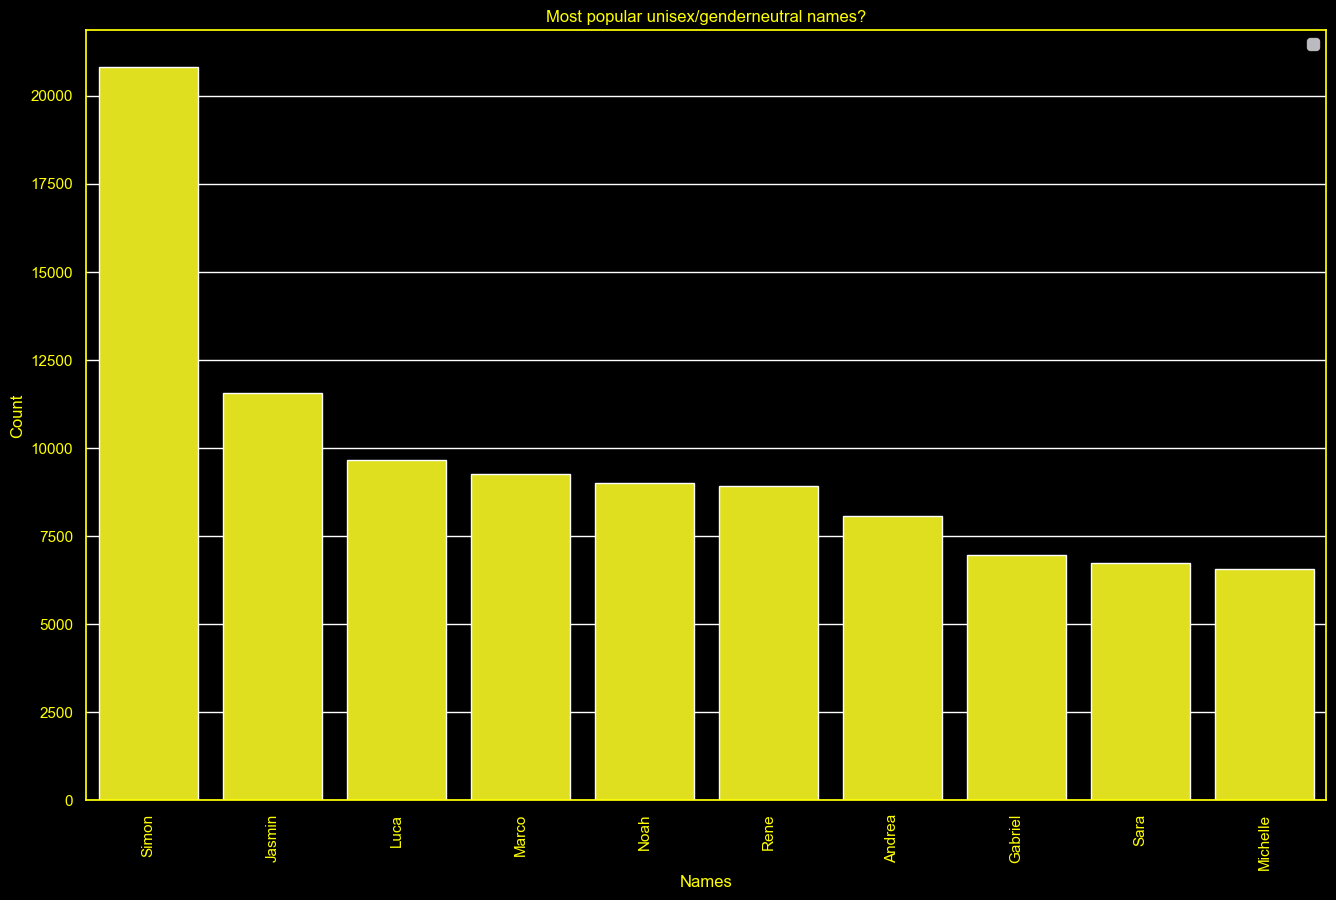

In [14]:
import seaborn as sns
import matplotlib.pylab as plt
#plot of absolute numbers
sns.set(style="darkgrid")
plt.figure(figsize=(16,10),facecolor='black')

#Set the axes background color
plt.gca().set_facecolor('black')

plt.gca().spines['bottom'].set_color('yellow')
plt.gca().spines['left'].set_color('yellow')
plt.gca().spines['top'].set_color('yellow')
plt.gca().spines['right'].set_color('yellow')


sns.barplot(x='Vorname', y='Total', data=most_pop_unisex_names, color='yellow')



plt.title('Most popular unisex/genderneutral names?', color='yellow')
plt.xlabel('Names', color='yellow')
plt.ylabel('Count', color='yellow')
plt.legend()

#Change tick colors to yellow
plt.tick_params(colors='yellow')

#Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=90)

plt.show()



In [12]:
gender_name_count = pd.read_sql("""SELECT COUNT(DISTINCT vorname) FROM vornamen GROUP BY geschlecht_bin;""", conn)
print(gender_name_count)

C:\Users\matte\AppData\Local\Temp\ipykernel_14692\1088886347.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gender_name_count = pd.read_sql("""SELECT COUNT(DISTINCT vorname) FROM vornamen GROUP BY geschlecht_bin;""", conn)


   COUNT(DISTINCT vorname)
0                    10725
1                    11718


In [13]:
bezirke_most_pop_names = pd.read_sql("""WITH RankedNames AS (
    SELECT 
        b.bundesland,
        v.geschlecht_bin,
        v.vorname,
        SUM(v.anzahl) AS Total,
        RANK() OVER (PARTITION BY b.bundesland, v.geschlecht_bin ORDER BY SUM(v.anzahl) DESC) as name_rank
    FROM 
        vornamen v
    INNER JOIN 
        bezirke b ON v.bezirk_id = b.bezirk_id
    WHERE 
        v.jahr_id <= 2010
    GROUP BY 
        b.bundesland, v.geschlecht_bin, v.vorname
)
SELECT 
    bundesland, 
    geschlecht_bin, 
    vorname, 
    Total
FROM 
    RankedNames
WHERE 
    name_rank = 1;
""" ,conn)
bezirke_most_pop_names.head(10)

C:\Users\matte\AppData\Local\Temp\ipykernel_14692\1500609121.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bezirke_most_pop_names = pd.read_sql("""WITH RankedNames AS (


DatabaseError: Execution failed on sql 'WITH RankedNames AS (
    SELECT 
        b.bundesland,
        v.geschlecht_bin,
        v.vorname,
        SUM(v.anzahl) AS Total,
        RANK() OVER (PARTITION BY b.bundesland, v.geschlecht_bin ORDER BY SUM(v.anzahl) DESC) as name_rank
    FROM 
        vornamen v
    INNER JOIN 
        bezirke b ON v.bezirk_id = b.bezirk_id
    WHERE 
        v.jahr_id <= 2010
    GROUP BY 
        b.bundesland, v.geschlecht_bin, v.vorname
)
SELECT 
    bundesland, 
    geschlecht_bin, 
    vorname, 
    Total
FROM 
    RankedNames
WHERE 
    name_rank = 1;
': 1267 (HY000): Illegal mix of collations (utf8mb4_general_ci,COERCIBLE) and (utf8mb4_0900_ai_ci,COERCIBLE) for operation '='